In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

# Ingest Data

In [3]:
file_path = r"D:\kaggle-kaggle-protien-data\train.csv"
raw_df = pd.read_csv(file_path)

m = raw_df.shape[0]
n = raw_df.shape[1]
print('Raw number of samples in train labels: {}'.format(m))

Raw number of samples in train labels: 31072


The data format is two-fold - first, the labels are provided for each sample in train.csv.

The bulk of the data is in the images - train.zip and test.zip. Within each of these is a folder containing four files per sample. Each file represents a different filter on the subcellular protein patterns represented by the sample. The format should be [filename]_[filter color].png for the PNG files, and [filename]_[filter color].tif for the TIFF files.

In [4]:
# Making sure the above statement is true. Each sample has 4 files.
# This code finds all file types in the directory just in case
# there are different types of extensions; just in case.
# https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
dir_path = r"D:\kaggle-kaggle-protien-data\train"
number_files = int(len([1 for x in list(os.scandir(dir_path)) if x.is_file()]) / 4)
print('Raw number of samples in the image directory: {}'.format(number_files))

Raw number of samples in the image directory: 31072


In [5]:
# Make a ind to protein label key:value pair
ind2protein = {
0: 'Nucleoplasm',  
1: 'Nuclear membrane',   
2: 'Nucleoli',   
3: 'Nucleoli fibrillar center',   
4: 'Nuclear speckles',   
5: 'Nuclear bodies',   
6: 'Endoplasmic reticulum',   
7: 'Golgi apparatus',   
8: 'Peroxisomes',   
9: 'Endosomes',   
10: 'Lysosomes',   
11: 'Intermediate filaments',   
12: 'Actin filaments',   
13: 'Focal adhesion sites',   
14: 'Microtubules',   
15: 'Microtubule ends',   
16: 'Cytokinetic bridge',   
17: 'Mitotic spindle',   
18: 'Microtubule organizing center',   
19: 'Centrosome',   
20: 'Lipid droplets',   
21: 'Plasma membrane',   
22: 'Cell junctions',   
23: 'Mitochondria',   
24: 'Aggresome',   
25: 'Cytosol',   
26: 'Cytoplasmic bodies',   
27: 'Rods & rings' 
}

# label = [
# 'Nucleoplasm',  
# 'xNuclear membrane',   
# 'Nucleoli',   
# 'Nucleoli fibrillar center',   
# 'Nuclear speckles',   
# 'Nuclear bodies',   
# 'Endoplasmic reticulum',   
# 'Golgi apparatus',   
# 'Peroxisomes',   
# 'Endosomes',   
# 'Lysosomes',   
# 'Intermediate filaments',   
# 'Actin filaments',   
# 'Focal adhesion sites',   
# 'Microtubules',   
# 'Microtubule ends',   
# 'Cytokinetic bridge',   
# 'Mitotic spindle',   
# 'Microtubule organizing center',   
# 'Centrosome',   
# 'Lipid droplets',   
# 'Plasma membrane',   
# 'Cell junctions',   
# 'Mitochondria',   
# 'Aggresome',   
# 'Cytosol',   
# 'Cytoplasmic bodies',   
# 'Rods & rings'] 

# ind = list(np.arange(30))

# ind2protein = dict(zip(ind, label))

In [6]:
%%time
raw_df['Target'] = raw_df['Target'].apply(lambda x: x.split())

# # Above is faster than code below.
# raw_df['Target'].str.split()

Wall time: 33.9 ms


In [7]:
def label_name(ind_list):
    '''Converts list of protein indexes into their label name.
    Arguments:
    ind_list -- list, indexes.
    
    Return:
    protein names'''
    return [ind2protein[int(index)] for index in ind_list]

In [8]:
raw_df['Target_name'] = raw_df['Target'].apply(label_name)

In [9]:
raw_df.head(10)

,Id,Target,Target_name
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]","[Cytokinetic bridge, Nucleoplasm]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]","[Golgi apparatus, Nuclear membrane, Nucleoli, ..."
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],[Nuclear bodies]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],[Nuclear membrane]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],[Microtubule organizing center]
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0],[Nucleoplasm]
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]","[Cytosol, Nucleoli]"
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0],[Nucleoplasm]
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]","[Nucleoli, Nucleoplasm]"
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,[7],[Golgi apparatus]


In [10]:
# Convert column of label protein name into a onehots dataframe for large dataframes.
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
mlb = MultiLabelBinarizer()
mlb.fit_transform(raw_df['Target_name'])[0,:]
onehots_df = pd.DataFrame(mlb.fit_transform(raw_df['Target_name']), columns=mlb.classes_, index=raw_df.index)

# Concat the onehots df to the raw_df
df = pd.concat([raw_df, onehots_df], axis=1)

# Make space in memory.
del raw_df

In [11]:
df.head()

,Id,Target,Target_name,Actin filaments,Aggresome,Cell junctions,Centrosome,Cytokinetic bridge,Cytoplasmic bodies,Cytosol,...,Mitotic spindle,Nuclear bodies,Nuclear membrane,Nuclear speckles,Nucleoli,Nucleoli fibrillar center,Nucleoplasm,Peroxisomes,Plasma membrane,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]","[Cytokinetic bridge, Nucleoplasm]",0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]","[Golgi apparatus, Nuclear membrane, Nucleoli, ...",0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],[Nuclear bodies],0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],[Nuclear membrane],0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],[Microtubule organizing center],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1 15126
2 12485
3 3160
4 299
5 2


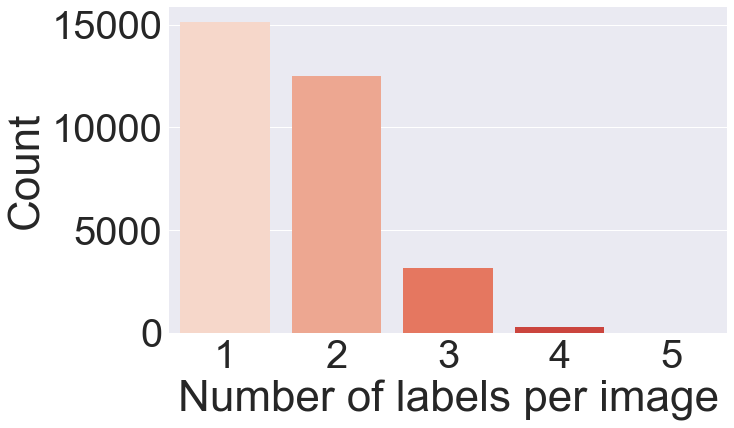

In [40]:
# Number of Labels per image distribution.
multi_label_freq= {}
for i, x in enumerate(range(1, 6), 1):
    print(i, onehots_df[onehots_df.sum(axis=1)==x].iloc[:,0].count())
    multi_label_freq[i] = onehots_df[onehots_df.sum(axis=1)==x].iloc[:,0].count()


plt.figure(figsize = (10,6))
sns.barplot(x = np.arange(1,6), y = list(multi_label_freq.values()), palette='Reds')
plt.xlabel('Number of labels per image')
plt.ylabel('Count')
plt.show()

del multi_label_freq

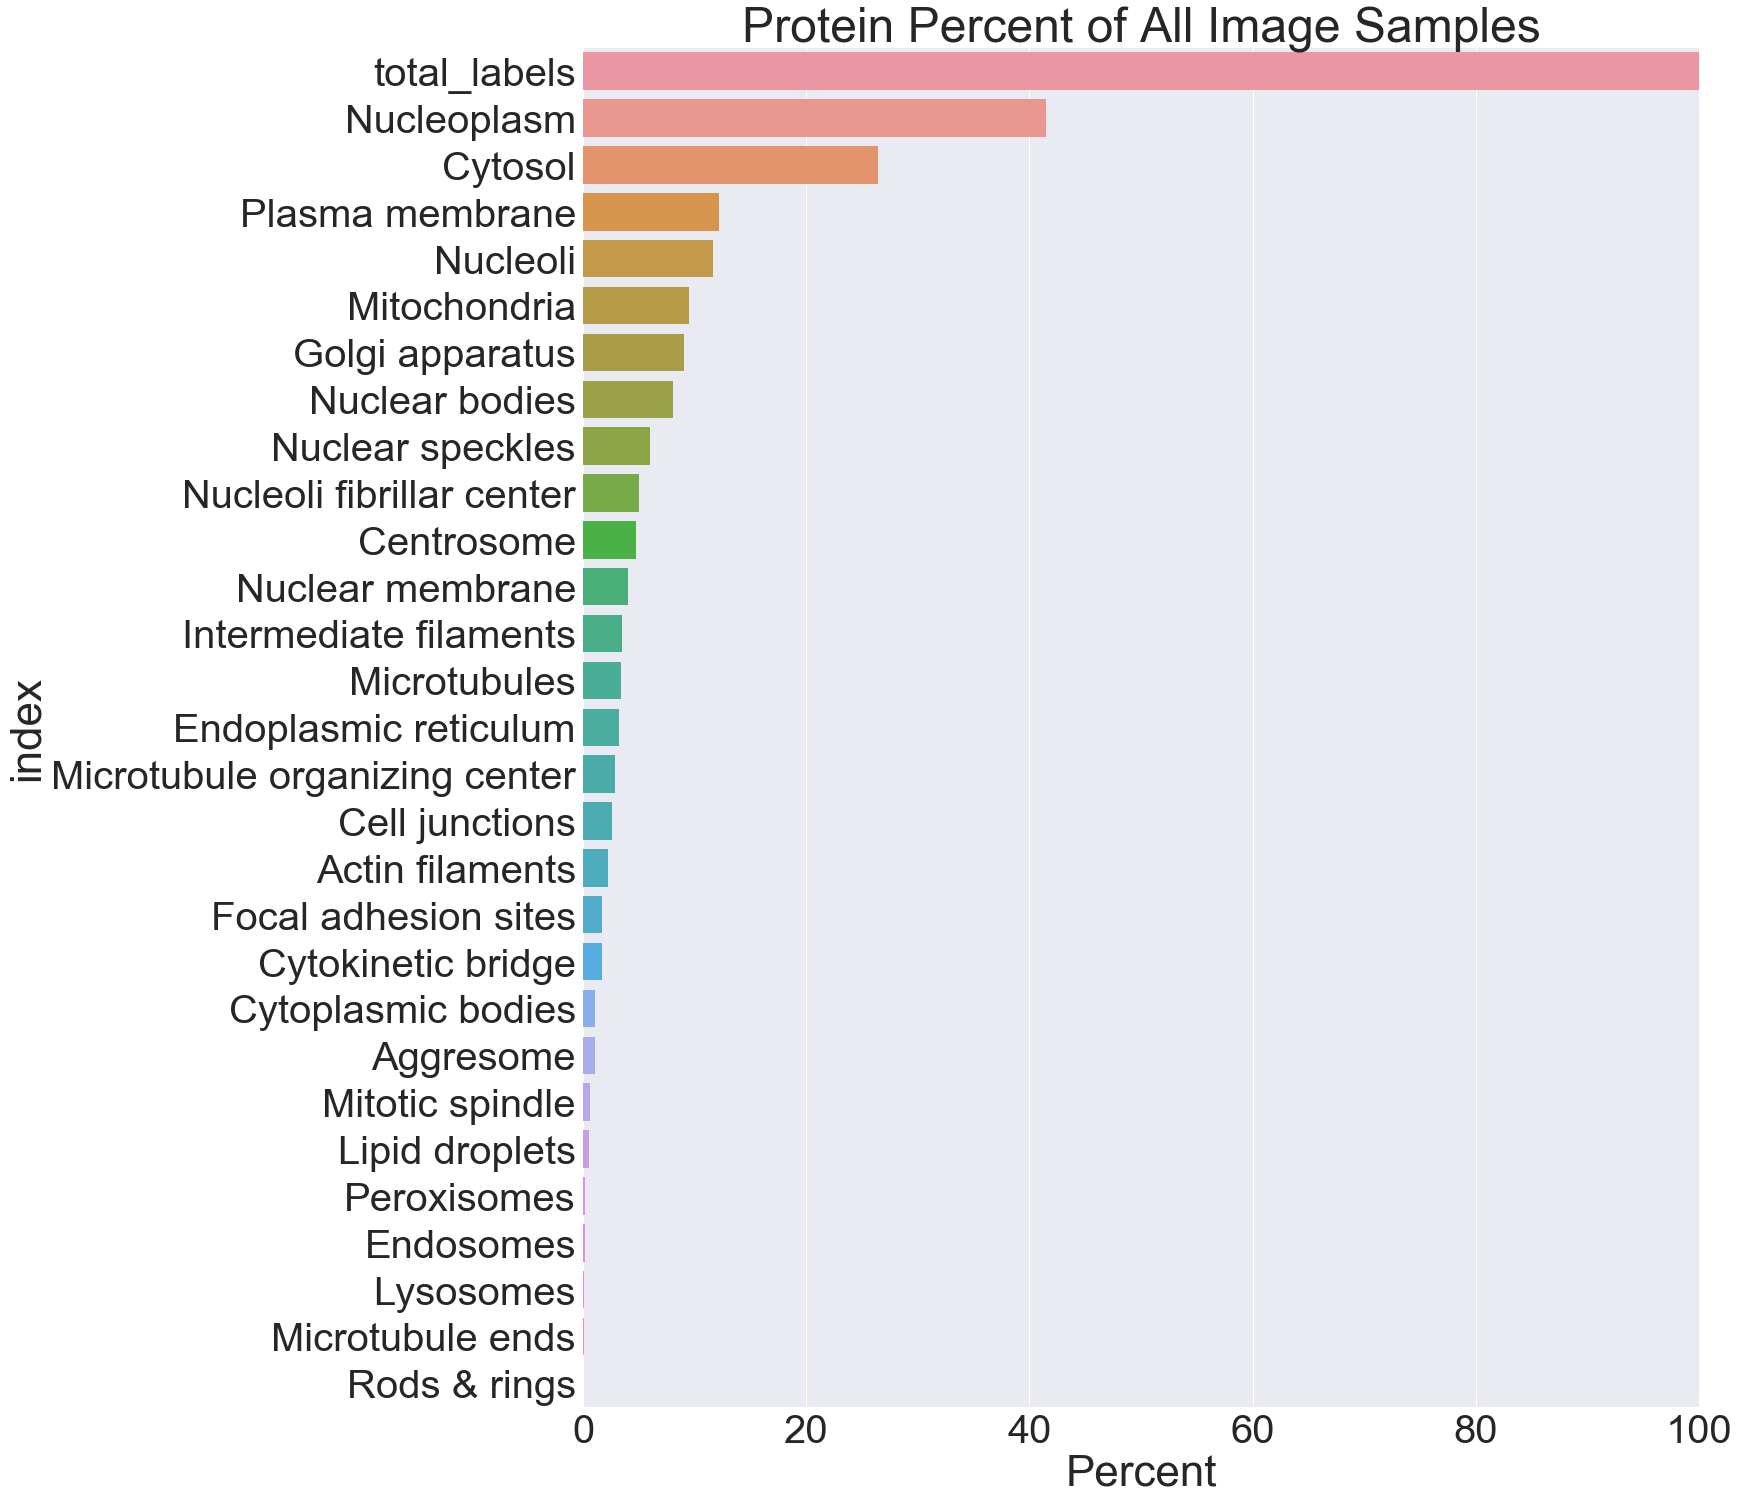

In [39]:
# Making a bar plot to see the occurence of labels.
# You can sum directly in a pandas df. You don't need to turn it numpy .values
plt.figure(figsize=(20,25))

# Percentage of occurance of all samples
perc_freq = (df.iloc[:,3:].sum() / m) *100
perc_freq.sort_values(ascending=False, inplace=True)

plt.xlim(0,100)
sns.barplot(x = perc_freq.reset_index().iloc[:,1], y = perc_freq.reset_index().iloc[:,0])
sns.set(font_scale=4)
plt.title('Protein Percent of All Image Samples')
plt.xlabel('Percent')
plt.show()

# del protein_sum

I think the image recognition model is going to have problems classifying some of the less frequent occuring proteins due to lack of labaled data. We'll see.

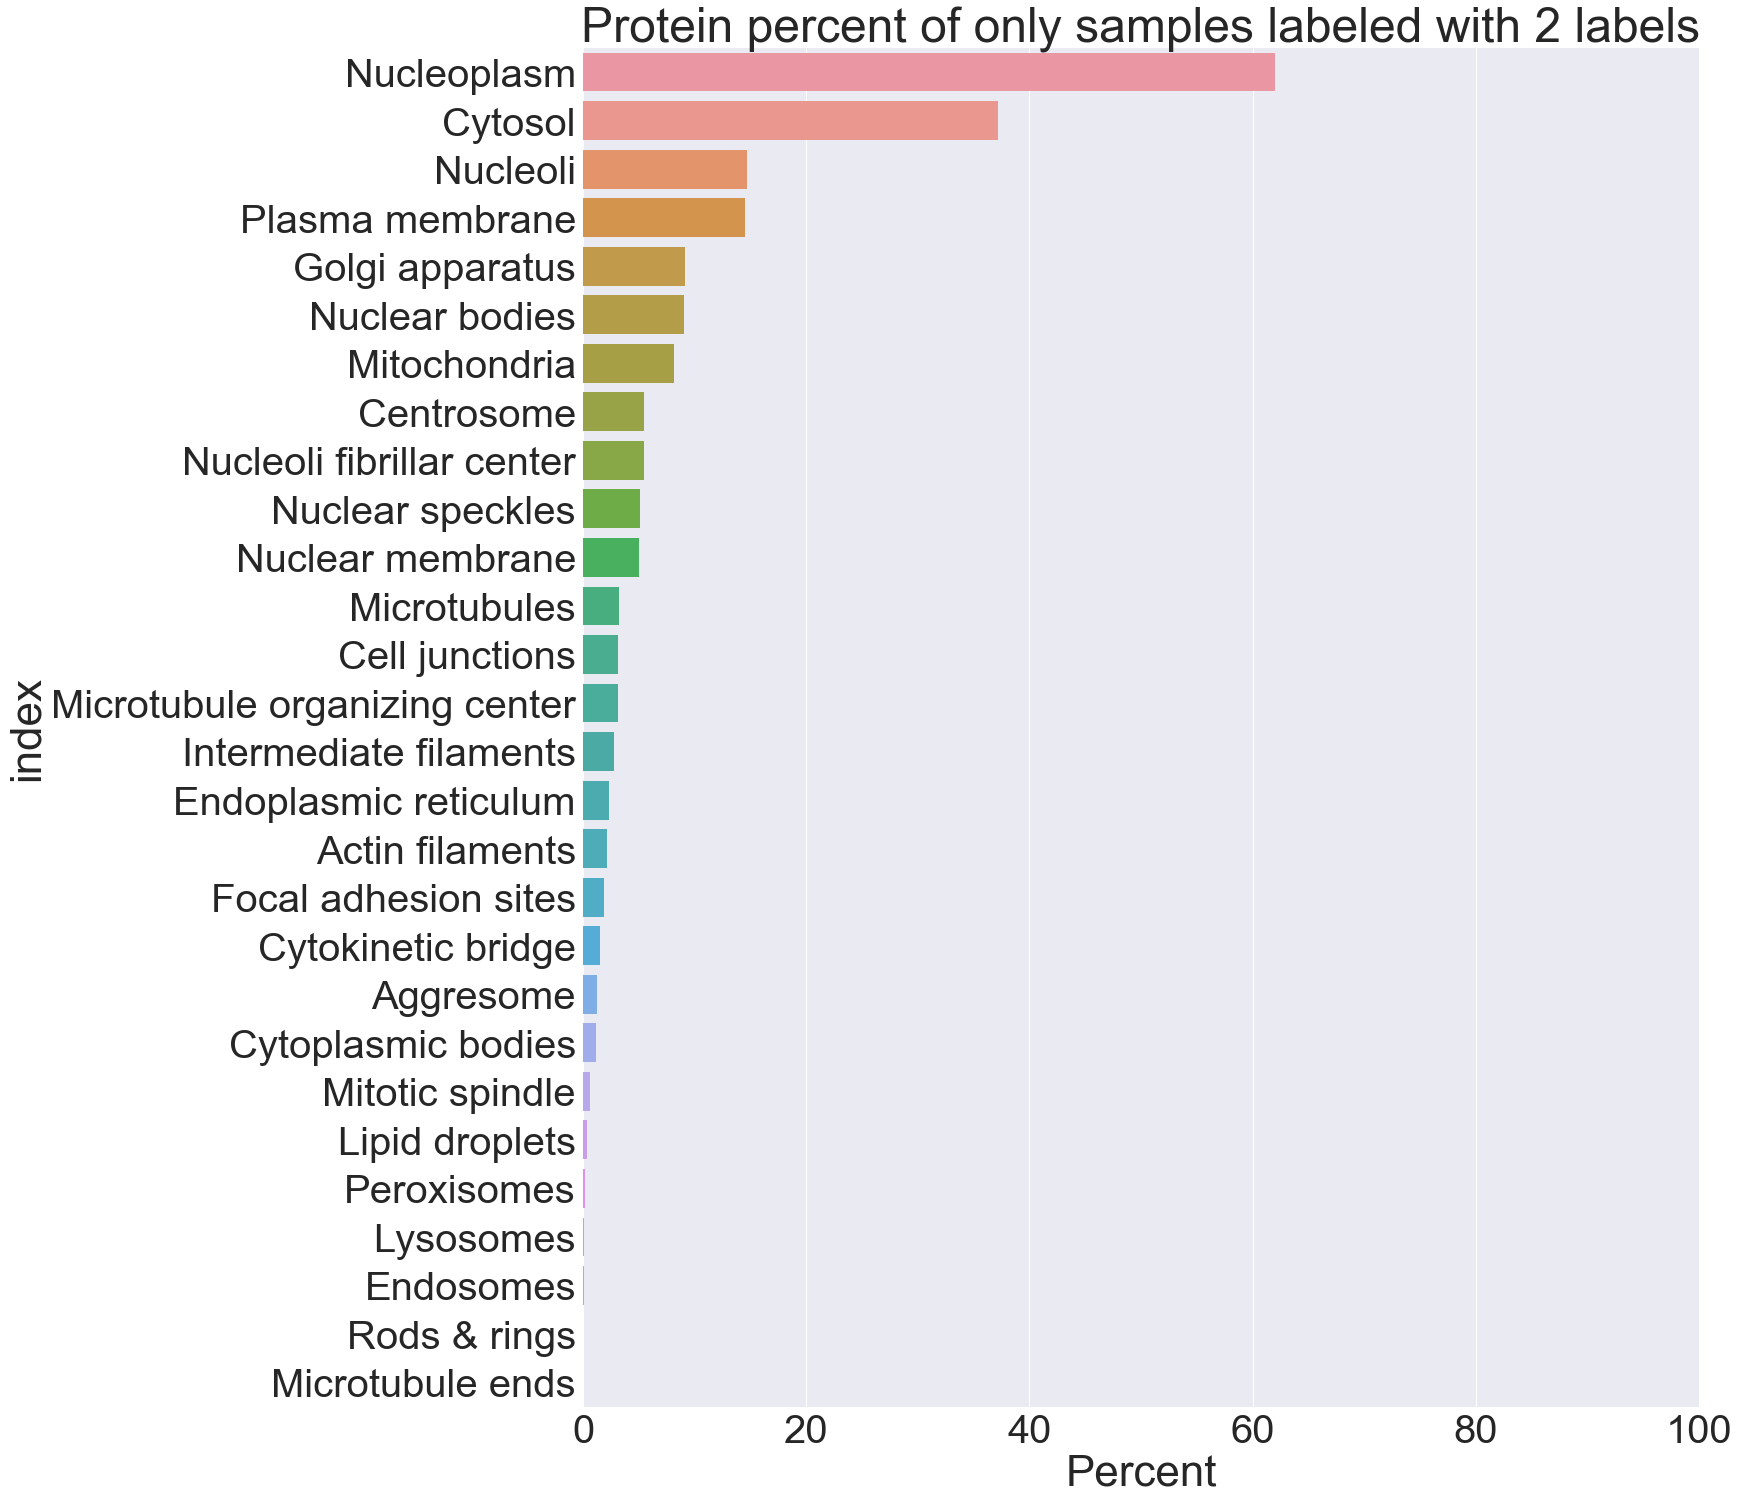

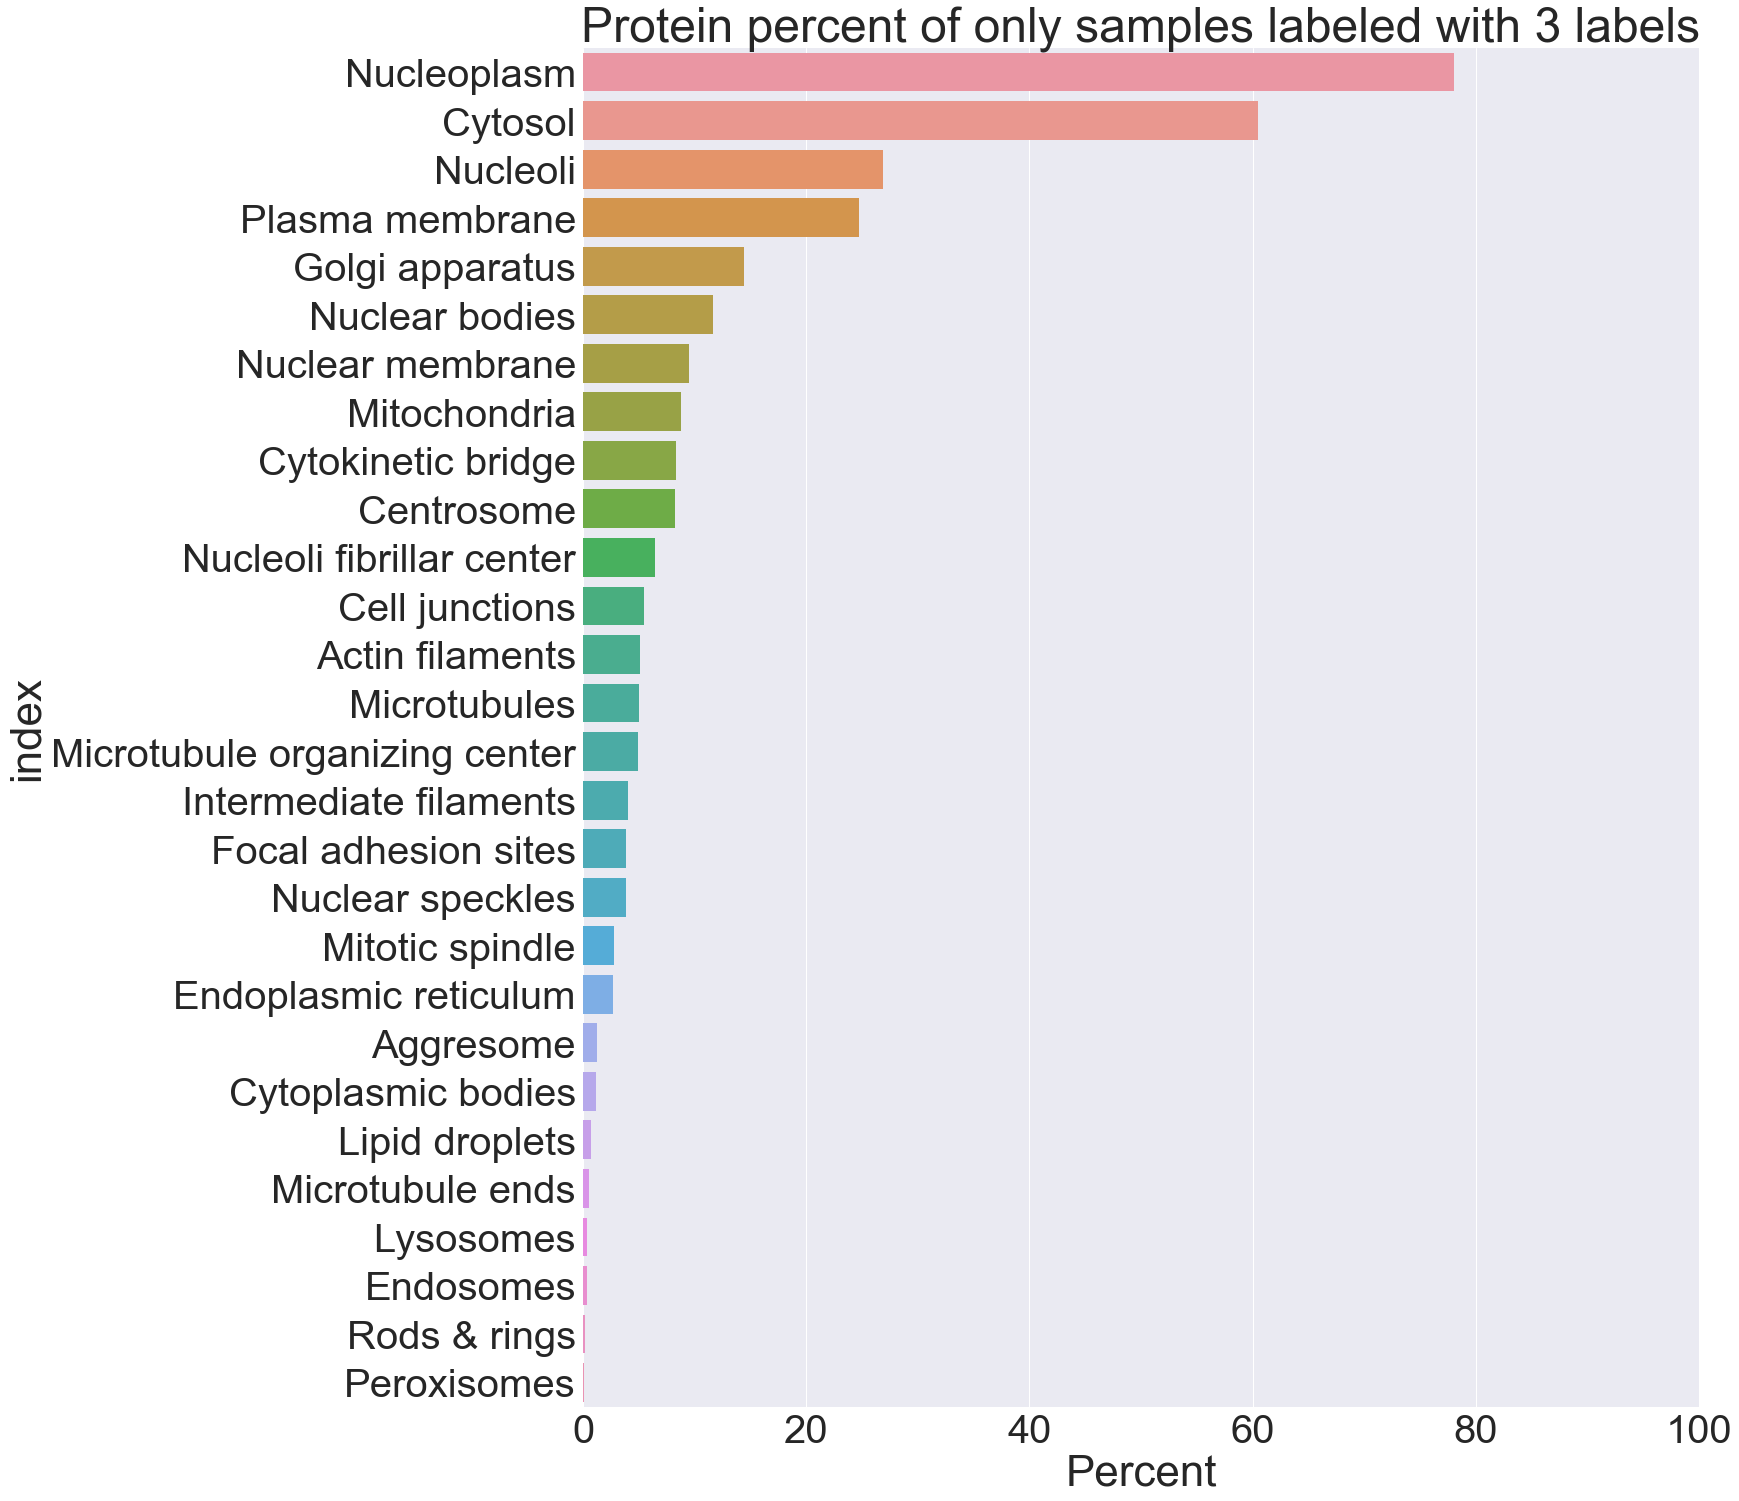

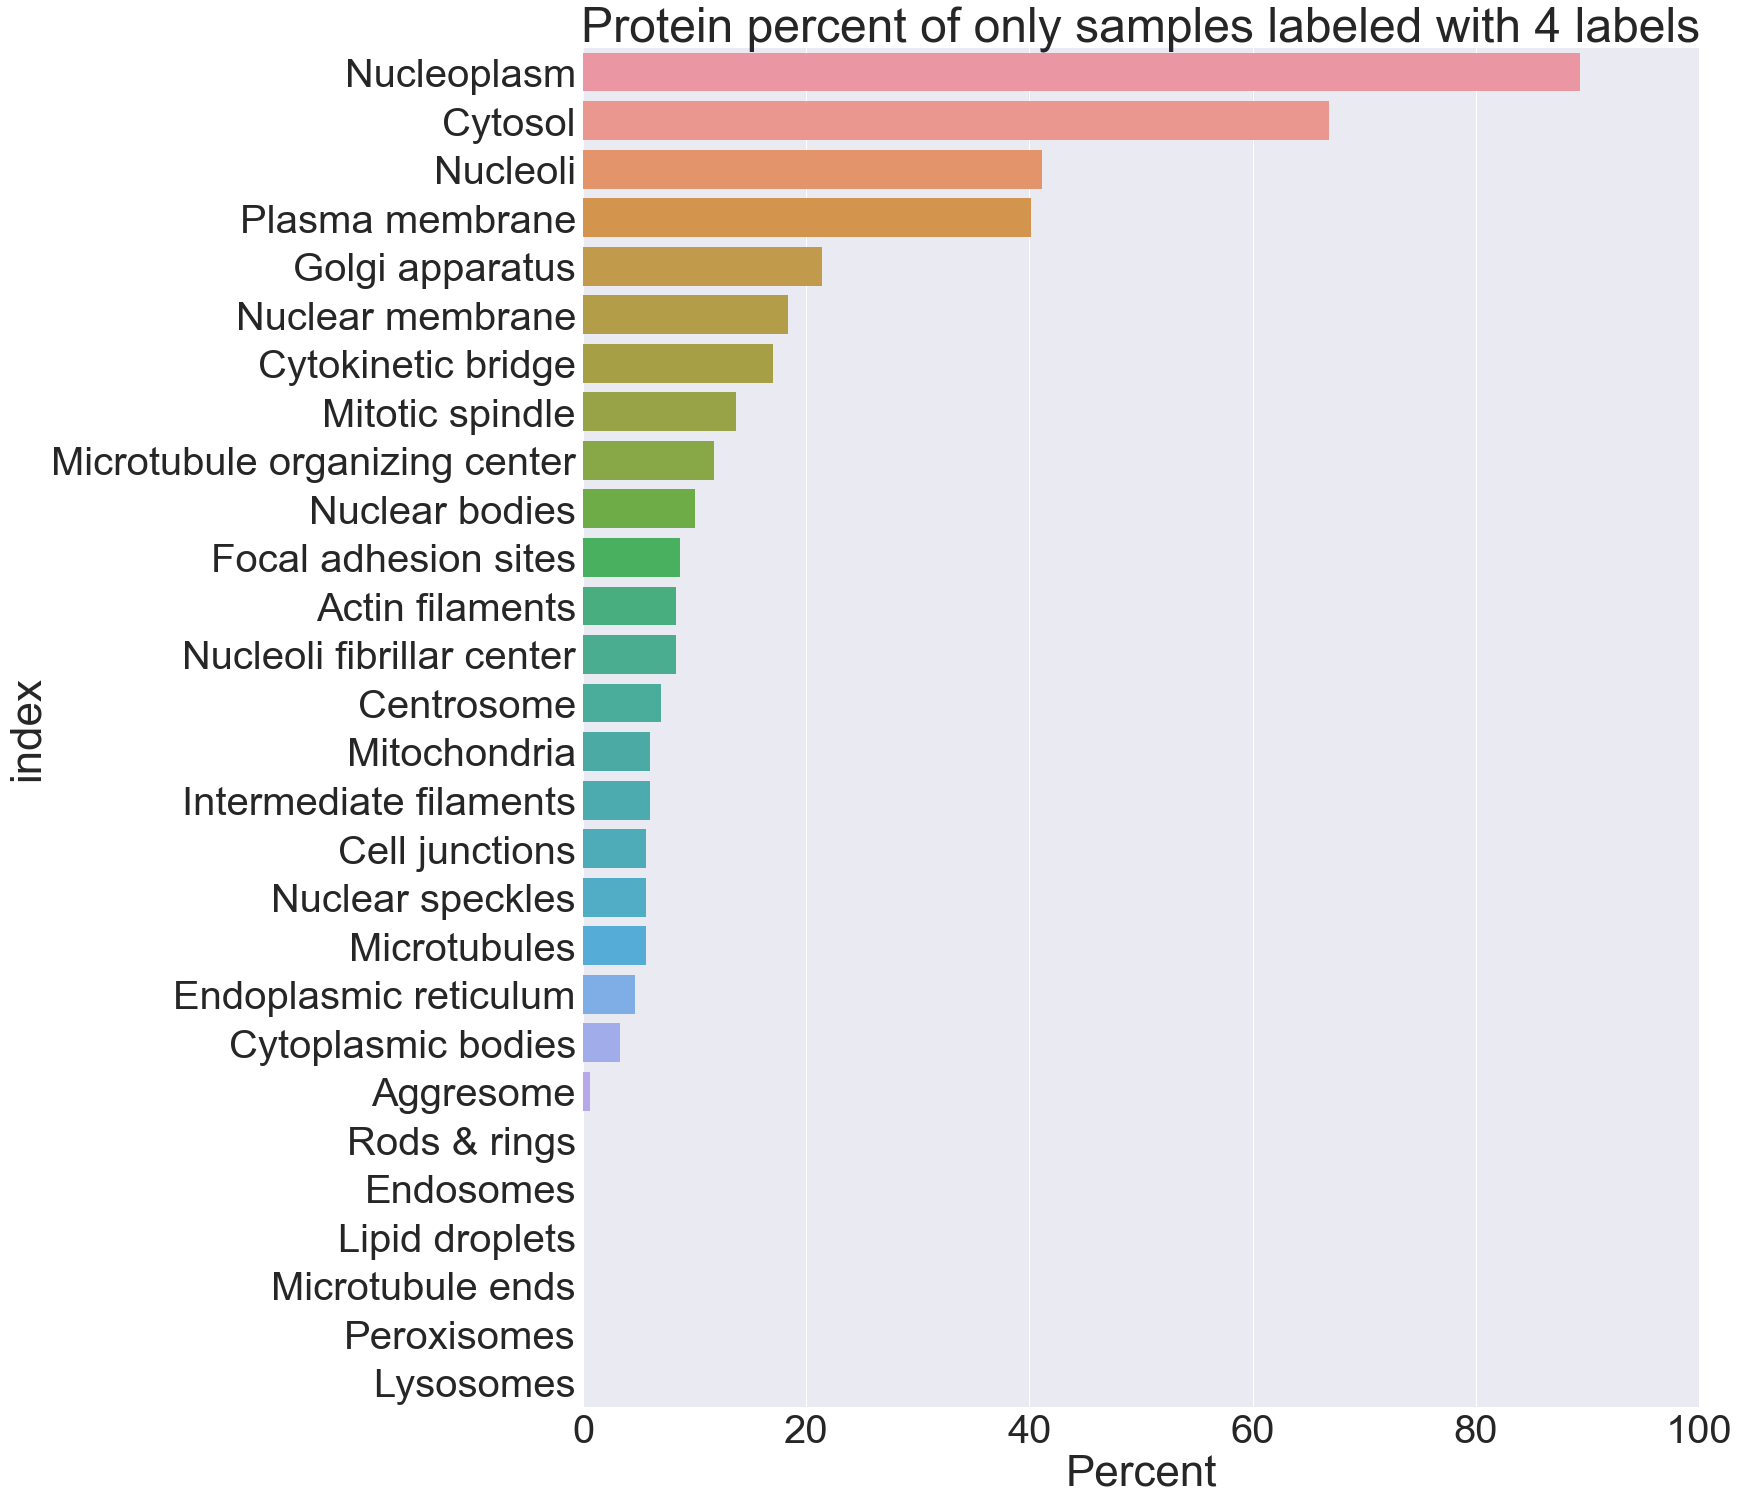

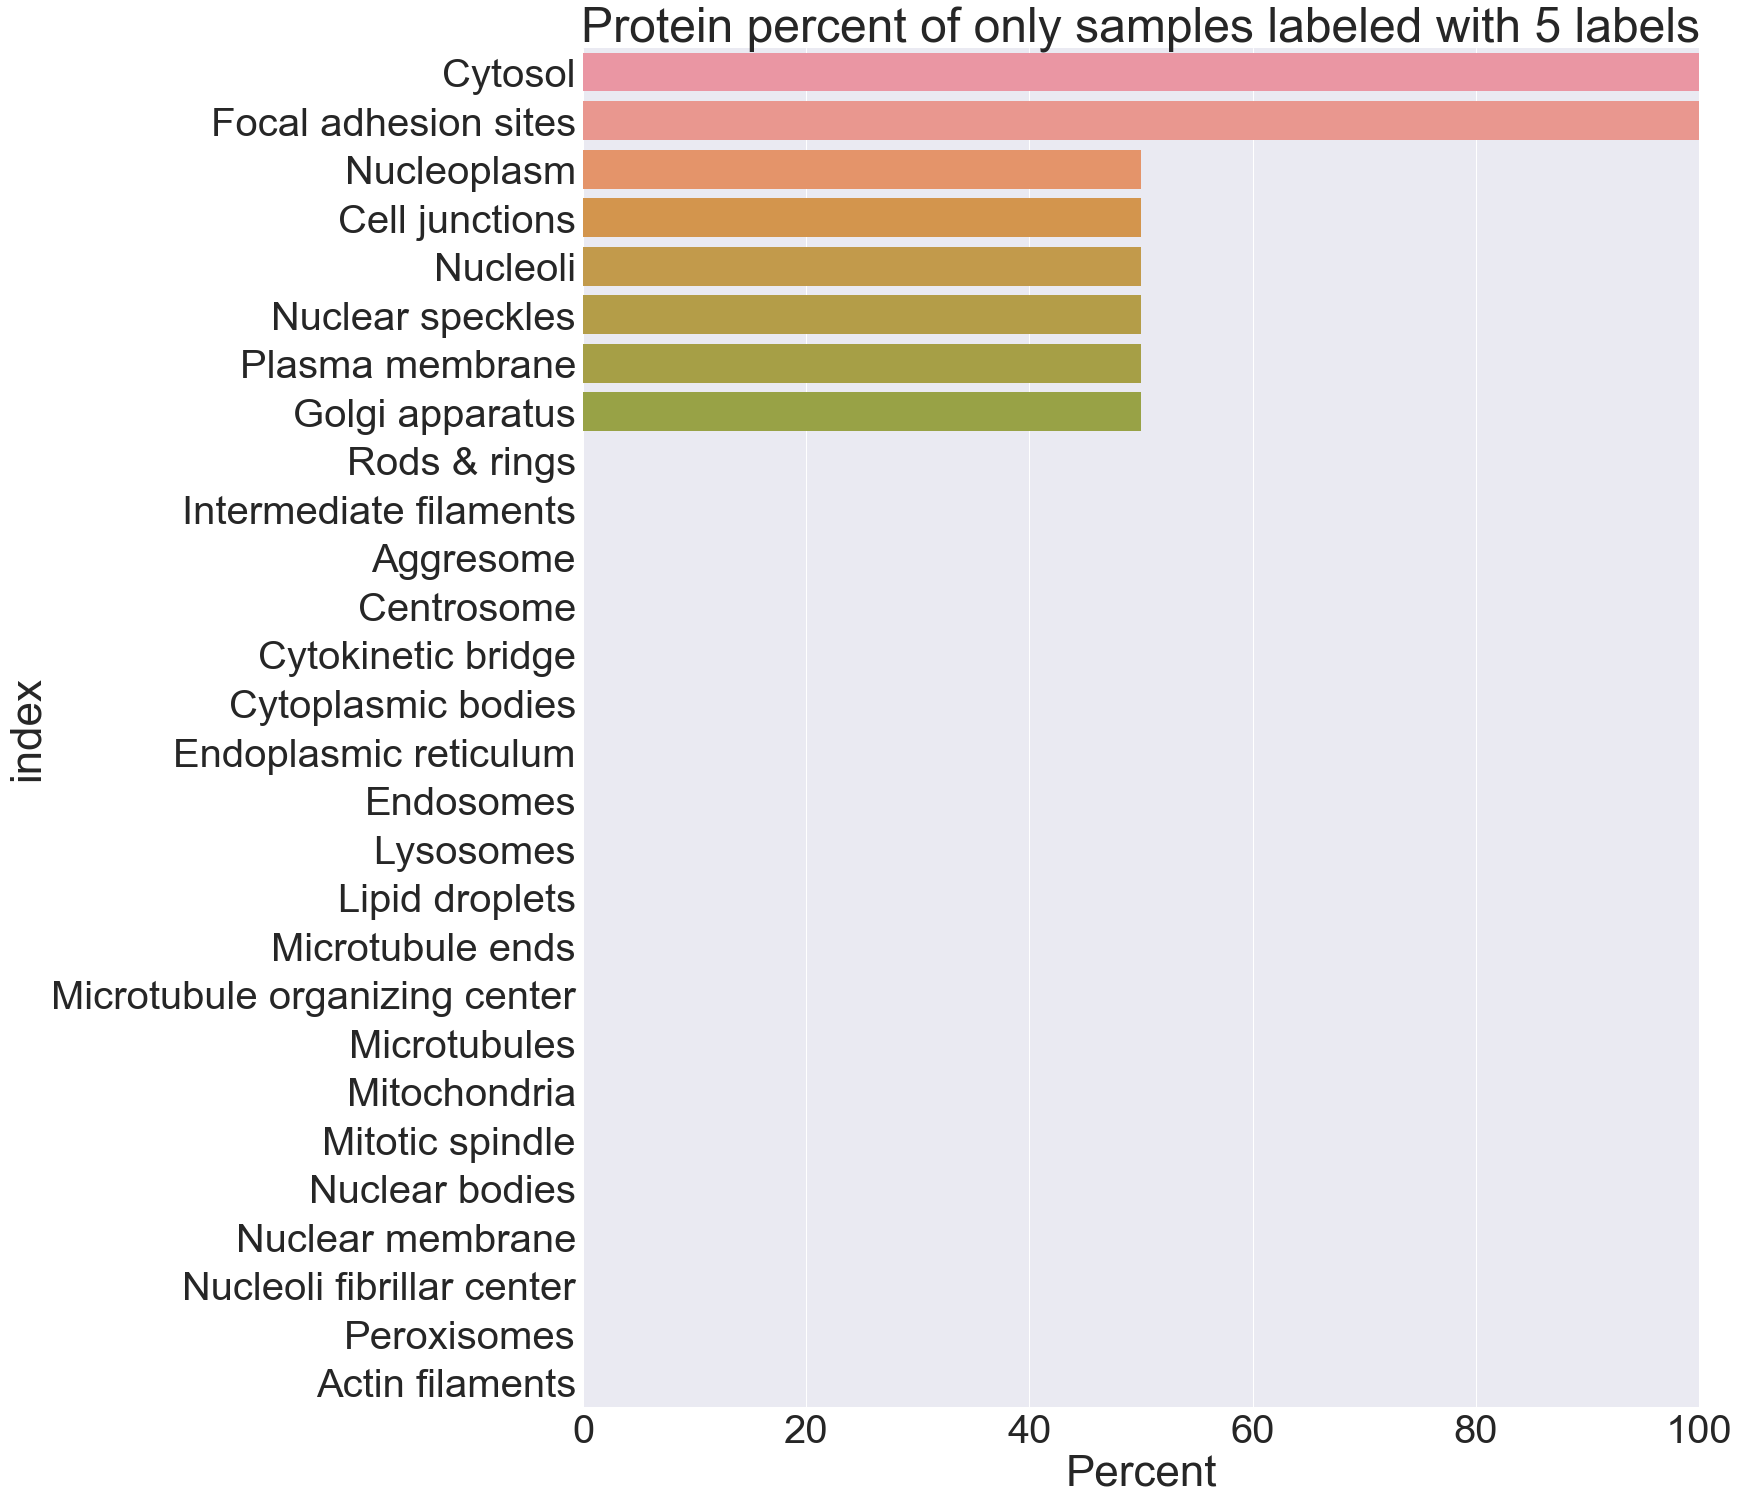

In [38]:
for i in range(2,6):
    num_labels = i

    m = onehots_df[onehots_df.sum(axis=1)==num_labels].iloc[:,0].count()
    plot_df = onehots_df[onehots_df.sum(axis=1) == num_labels].sum().sort_values(ascending=False).reset_index()
    plot_df[0] = plot_df[0].apply(lambda x: (x/m)*100)

    plt.figure(figsize=(20,25))
    plt.xlim(0,100)
    sns.barplot(x = plot_df.iloc[:,1], y = plot_df.iloc[:,0])
    sns.set(font_scale=4)
    plt.title('Protein percent of only samples labeled with {} labels'.format(num_labels))
    plt.xlabel('Percent')
    plt.show()


    
# reset m to what it should really by
m = df.shape[0]

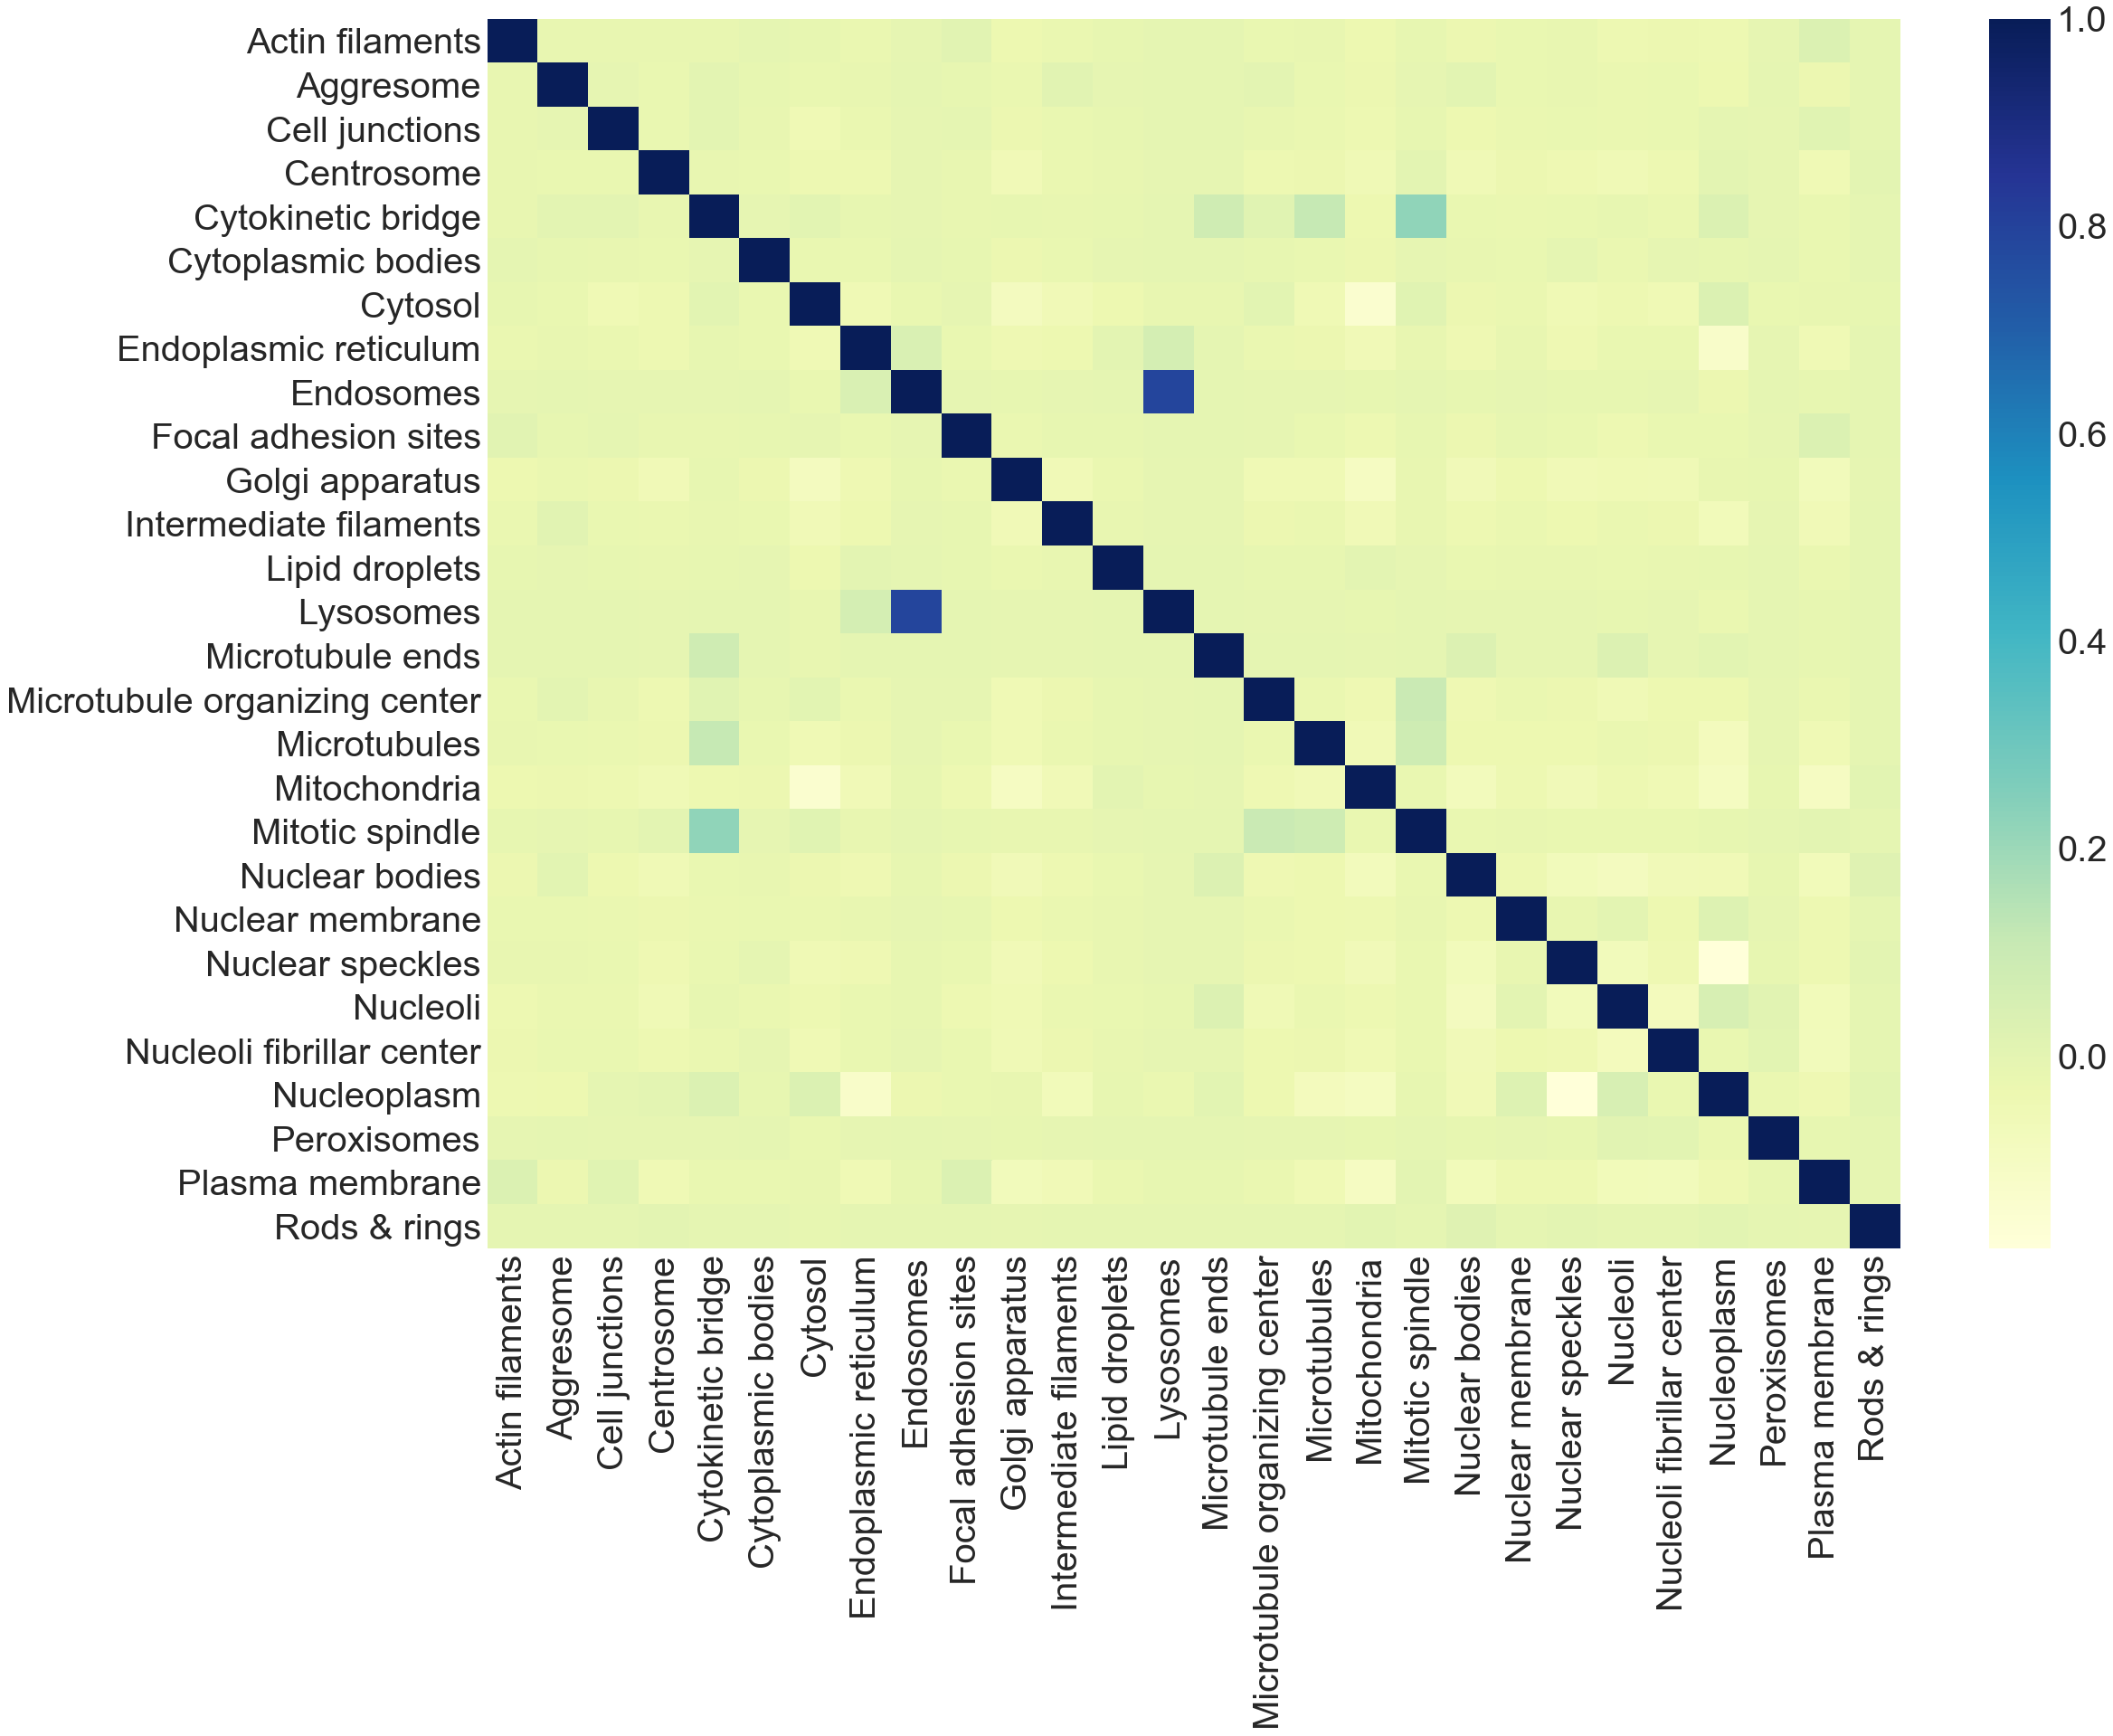

In [37]:
# Add total_labels column so you can filter out the multi-label examples for a heatmap.
df['total_labels'] = df.iloc[:,3:].sum(axis=1)

# Pearsons default correlation in pandas.
plt.figure(figsize=(35,25))
sns.heatmap(df[df['total_labels']>1].iloc[:,3:-1].corr(), cmap='YlGnBu')
plt.show()

Lysosomes and Endosomes seem to be correlated which means both appear in training examples often together.

As well as Cytokinetic bridge, Mitotic spindle, microtubules, and microtubule ends.

Let's examine this further.

only endosomes 45
only lysosomes 28
lysosome + endosome 28


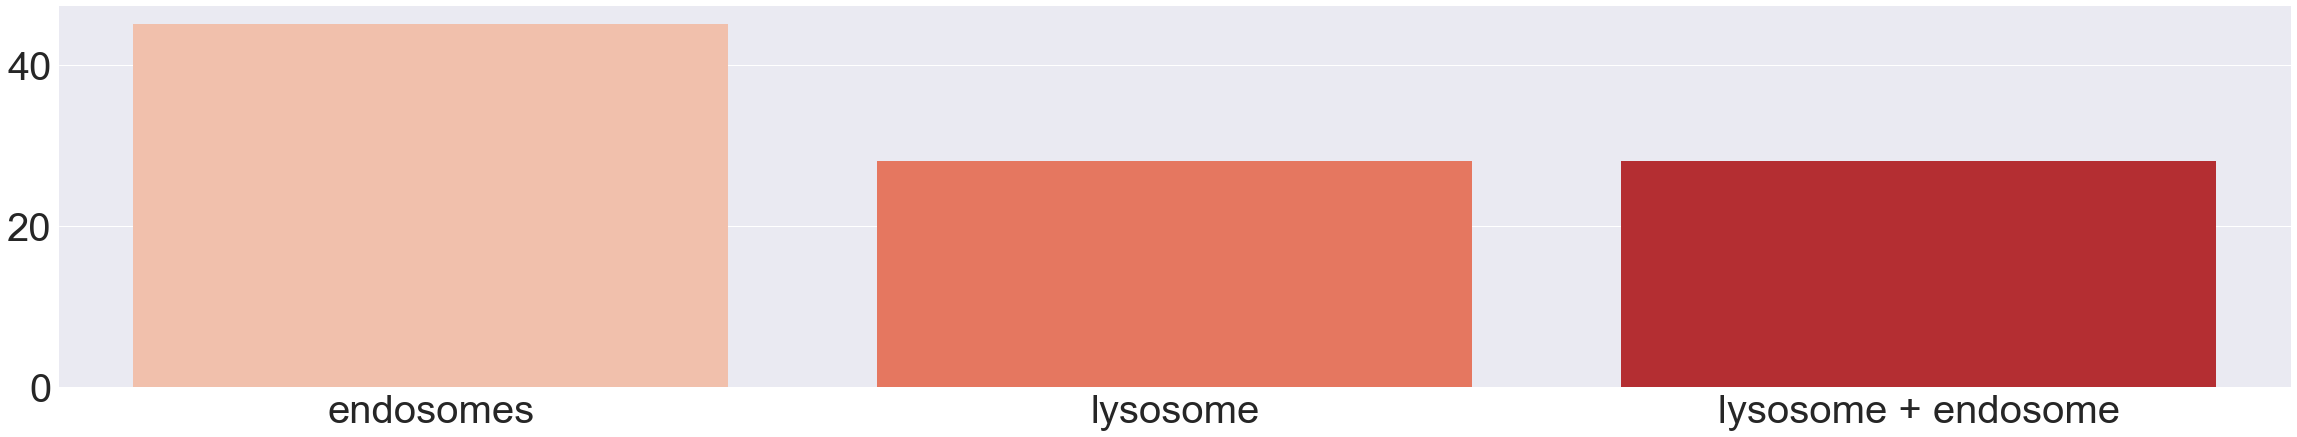

In [84]:
end = df[(df['Endosomes']==1)].shape[0]
lys = df[(df['Lysosomes']==1)].shape[0]
endlys = df[(df['Lysosomes']==1)&(df['Endosomes']==1)].shape[0]

print('only endosomes', end)
print('only lysosomes', lys)
print('lysosome + endosome', endlys)

plt.figure(figsize=(40,7))
sns.barplot(x = ['endosomes', 'lysosome', 'lysosome + endosome'],
            y = [end, lys, endlys], palette='Reds')
plt.show()

It is clear that all lysosomes paired with endosomes but not vice-versa in the label data set. That correlation is more clear to us now.

# redo
Looking at the correlation heatmap, the cytokinetic bridge has some type of correlation with microtubules, mitotic spindle, and microtubule ends. The distribution of these labels show that Microtubules are much more prevalant. However, looking at the correlation heatmap, there seems to be less correlations with Microtubules and other organelles. So, let's keep the investigating on correlations with the cytokinetic bridge and other organelles. In addition, the cytokinetic bridge also has a strong correlation with the mitotic spindle and this organelle as some correlation with the Microtubule organizing center. However, the cytokinetic bridge does not have much correlation or none with the Microtubule organizing center. I wonder why?

In [118]:
print(df[df['Microtubules']==1].shape[0])
print(df[df['Cytokinetic bridge']==1].shape[0])
print(df[df['Mitotic spindle']==1].shape[0])
# print(df[df['Microtubule ends']==1].shape[0])  # shows in cytokinetic bridge but not with mitotic spindle 
# print(df[df['Microtubule organizing center']==1].shape[0]) # shows in mitotic spindle but not cytokinetic bridge

1066
530
210


In [117]:
print(df[df['Microtubules']==1].shape[0])
print(df[df['Cytokinetic bridge']==1].shape[0])
print(df[df['Mitotic spindle']==1].shape[0])
print(df[df['Microtubule ends']==1].shape[0])
print('')
print(df[(df['Cytokinetic bridge']==1)&(df['Mitotic spindle']==1)].shape[0])
print(df[(df['Cytokinetic bridge']==1)&(df['Microtubules']==1)].shape[0])
print(df[(df['Cytokinetic bridge']==1)&(df['Microtubule ends']==1)].shape[0])
print('')
print(df[(df['Microtubule organizing center']==1)&(df['Mitotic spindle']==1)].shape[0])

1066
530
210
21

77
102
9

49
